In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
from sklearn.decomposition import nmf
from sklearn.preprocessing import normalize
from numpy import linalg, random
from numpy.linalg import norm
from util import *
from nmf_adaptive import non_negative_factorization, overall_check
from pathlib import Path
Path.ls = lambda x:list(x.iterdir())
from sklearn.cluster import KMeans
import hickle
import re

In [169]:
U1,V1,n_iter = nmf.non_negative_factorization(P,n_components=10)
U1[:,0] = U1[:,0] * 4                                                             0
U1 = normalize(U1,norm = 'l1', axis = 1)
V1 = normalize(V1, norm = 'l1', axis = 1)

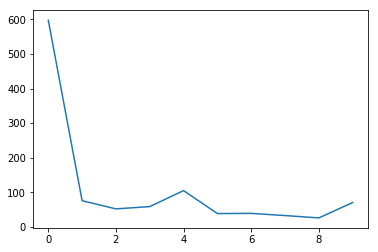

In [170]:
plt.plot(np.sum(U1, axis = 0))

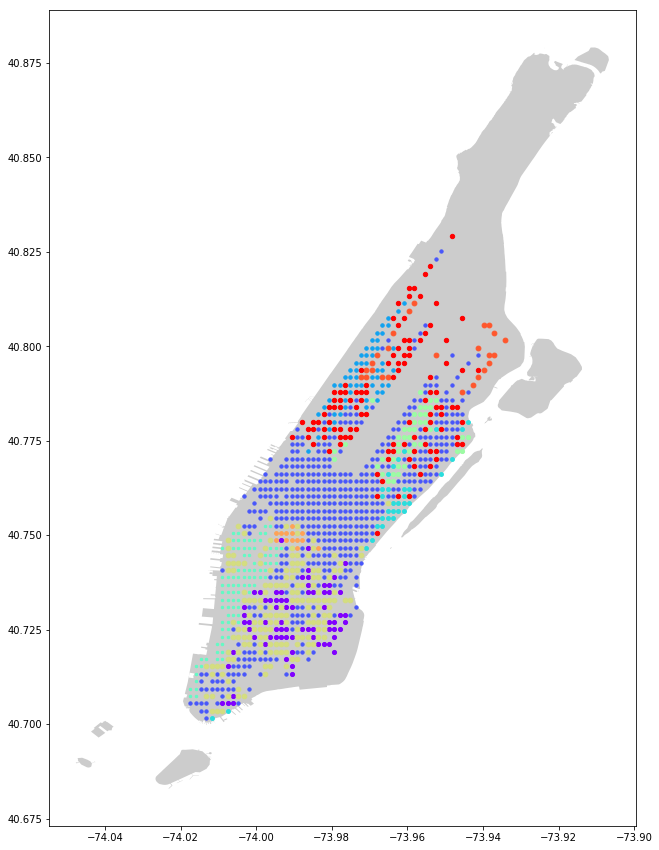

In [171]:
R = 100
r = 10
DIR = Path(r'C:\Research\NMF\State-Aggregation')
PATH = DIR/str(R)
man = get_zones()
grid = get_joint_grid(man, R) 
grid = grid = get_center(grid)
statemap = hickle.load(f'{str(PATH)}\\{R}_Statemap.hkl')
inv_statemap = {v:k for k,v in statemap.items()}
pred = KMeans(n_clusters=r, n_init = 100).fit_predict(U1)

mapped_result = []
for group in range(r):
    mapped_result.append([float(inv_statemap[mem]) for mem in list(np.where(pred == group)[0])])
fig, ax = plt.subplots(figsize = (15,15))
man.plot(ax=ax, color = 'grey', alpha = 0.4)
ColorsA=plt.cm.rainbow(np.linspace(0,1,r),alpha=10)
#review = np.where(U[:,2] == 1)[0]
#grid.iloc[[float(inv_statemap[x]) for x in review],].plot(**{'color': 'blue', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[mapped_result[0],].plot(**{'color': 'red', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[[mapped_result[0]],].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)
for i,group in enumerate(mapped_result):
    grid.iloc[group,].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)

In [19]:
overall_check(P, U1, V1.T)

{'overall': 1.2100104952549855, 'regularize': 4.4998774413913365}

In [21]:
overall_check(P, U0, V0)

{'overall': 1.5416493927734392, 'regularize': 1.7403915295350134}

In [4]:
path = Path(r'C:\Research\NMF\State-Aggregation\150\1')

U0,V0 = hickle.load(r'C:\Research\NMF\State-Aggregation\100\1\Output_r=6')
P = hickle.load(r'C:\Research\NMF\State-Aggregation\100\100_Matrix.hkl')

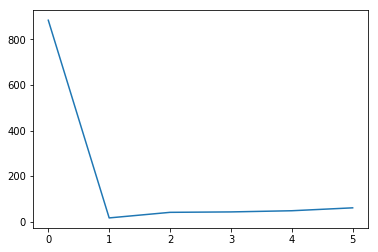

In [120]:
plt.plot(np.sum(U0, axis = 0))

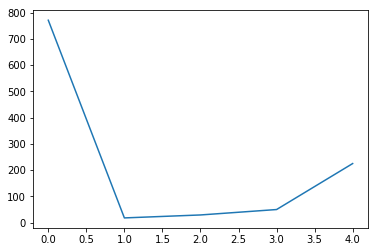

In [111]:
plt.plot(np.sum(U2, axis = 0))

In [49]:
pred = KMeans(n_clusters=6, n_init = 100).fit_predict(U0)

(array([209.,   0., 392.,   0.,  99.,   0., 200.,   0., 180.,  13.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

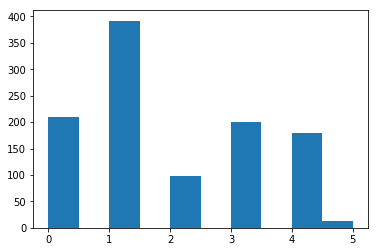

In [50]:
plt.hist(pred)

## plt.plot(np.sum(U1, axis = 0))

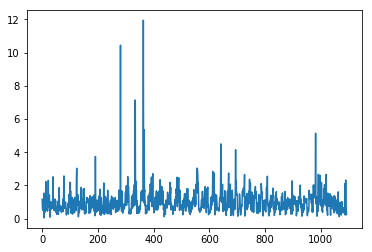

In [25]:
plt.plot(np.sum(U1@V1, axis = 0))

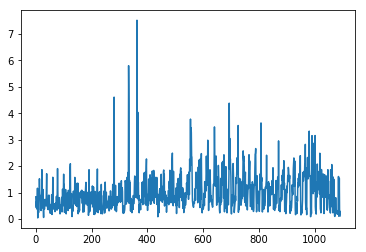

In [24]:
plt.plot(np.sum(U0@V0.T, axis = 0))

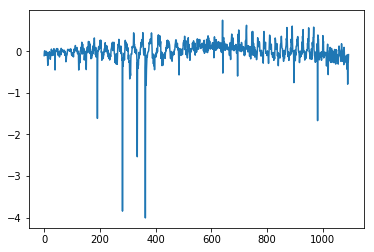

In [27]:
plt.plot(np.sum(P, axis = 0) - np.sum(U1@V1, axis = 0))

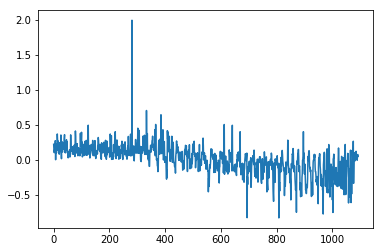

In [26]:
plt.plot(np.sum(P, axis = 0) - np.sum(U0@V0.T, axis = 0))

In [212]:
U2,V2,mu, E= non_negative_factorization(P,1,lr = 1000,lambda_=1e-8,eps =1e-14, local =False, max_iter = 10)

C:\Research\NMF\State-Aggregation\nmf_adaptive.py:67: RuntimeWarning: divide by zero encountered in true_divide
  pdb.set_trace()


ValueError: assignment destination is read-only

In [ ]:
sum([norm(U0[:,i]) * norm(V0[:,i]) for i in range(U0.shape[1])])

In [83]:
np.random.random((10,10,1))[0]

array([[0.28968167],
       [0.73539689],
       [0.62135424],
       [0.44315266],
       [0.668914  ],
       [0.7709683 ],
       [0.89750871],
       [0.44035511],
       [0.6426097 ],
       [0.38146028]])

In [88]:
[1,2].pop()

2

In [ ]:
U1.shape, V1.shape

In [ ]:
norm(U1[:,0])

In [ ]:
np.sqrt(sum([x**2 for x in U1[:,0]]))

In [ ]:
[norm(U1[:,i]) * norm(V1.T[:,i]) for i in range(U1.shape[1])]

In [ ]:
np.max(E.flatten())

In [ ]:
U1,V1,n_iter = nmf.non_negative_factorization(P,n_components=10)

U1 = normalize(U1,norm = 'l1', axis = 1)
V1 = normalize(V1, norm = 'l1', axis = 1)

In [ ]:
norm(P-U1@V1)

In [ ]:
norm(P - U0@V0.T)

In [ ]:
norm(P - U0@V0.T)

In [67]:
np.quantile(np.sum(U0,axis = 0), q = [0.9,0.75,0.5,0.25,0.1])

array([500.04754341,  95.67088793,  36.88110715,  12.06230094,
         9.57134944])

In [140]:
norm(normalize(U0,axis = 0),axis =0)

array([1., 1., 1., 1., 1., 1.])

In [141]:
temp = normalize(U0, axis = 0)

In [143]:
np.sum(U0,axis = 0)

array([44.18071091, 16.58426477, 41.05292201, 42.89775747, 48.04424392,
       60.80659358])

In [142]:
np.sum(temp,axis = 0)

array([32.16505   , 17.74175414, 23.52756734, 23.46480069, 22.97120579,
       21.0229427 ])

In [134]:
U0[:,0] = U0[:,0]*10

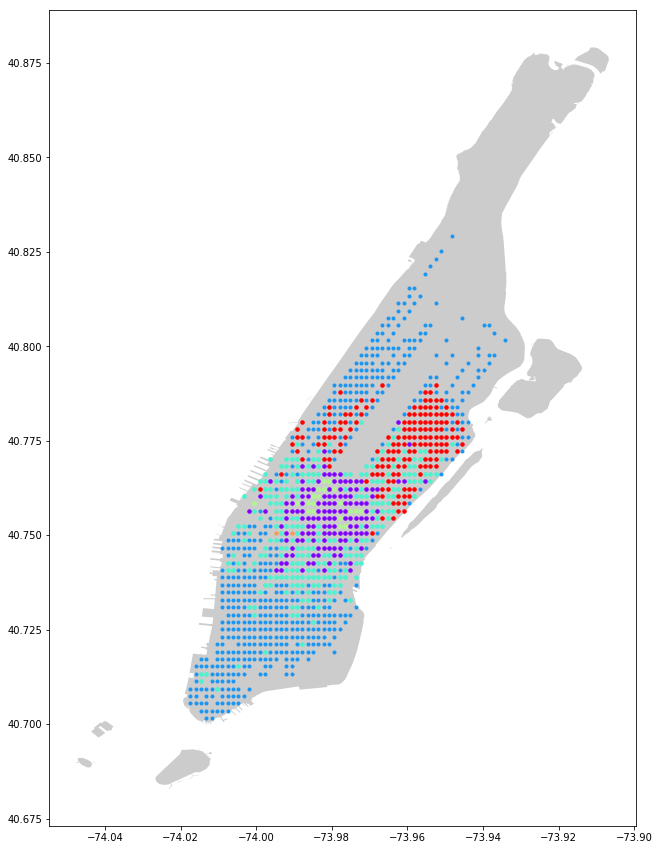

In [146]:
R = 100
r = 6
DIR = Path(r'C:\Research\NMF\State-Aggregation')
PATH = DIR/str(R)
man = get_zones()
grid = get_joint_grid(man, R) 
grid = grid = get_center(grid)
statemap = hickle.load(f'{str(PATH)}\\{R}_Statemap.hkl')
inv_statemap = {v:k for k,v in statemap.items()}
pred = KMeans(n_clusters=r, n_init = 100).fit_predict(temp)

mapped_result = []
for group in range(r):
    mapped_result.append([float(inv_statemap[mem]) for mem in list(np.where(pred == group)[0])])
fig, ax = plt.subplots(figsize = (15,15))
man.plot(ax=ax, color = 'grey', alpha = 0.4)
ColorsA=plt.cm.rainbow(np.linspace(0,1,r),alpha=10)
#review = np.where(U[:,2] == 1)[0]
#grid.iloc[[float(inv_statemap[x]) for x in review],].plot(**{'color': 'blue', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[mapped_result[0],].plot(**{'color': 'red', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[[mapped_result[0]],].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)
for i,group in enumerate(mapped_result):
    grid.iloc[group,].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)

In [279]:
np.sum(U2,axis =0)

array([528.00370175,  73.25927503,  44.6468218 , 309.15011115,
        84.16838508,   5.07433463,  48.69737056])

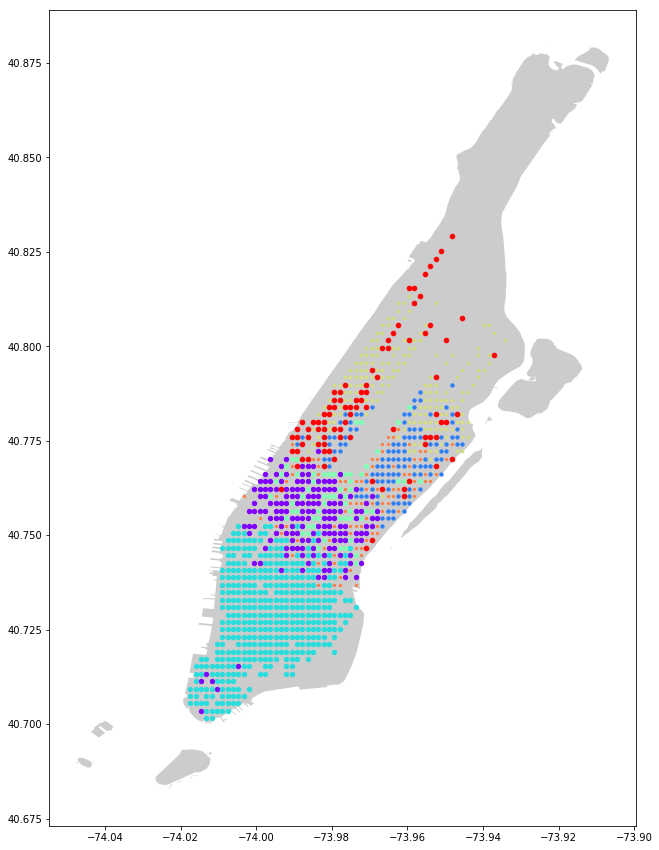

In [278]:
U2,V2 = hickle.load(r'C:\Research\NMF\State-Aggregation\100\10\Output_r=07')

R = 100
r = 7
DIR = Path(r'C:\Research\NMF\State-Aggregation')
PATH = DIR/str(R)
man = get_zones()
grid = get_joint_grid(man, R) 
grid = grid = get_center(grid)
statemap = hickle.load(f'{str(PATH)}\\{R}_Statemap.hkl')
inv_statemap = {v:k for k,v in statemap.items()}
pred = KMeans(n_clusters=r, n_init = 100).fit_predict(U2)

mapped_result = []
for group in range(r):
    mapped_result.append([float(inv_statemap[mem]) for mem in list(np.where(pred == group)[0])])
fig, ax = plt.subplots(figsize = (15,15))
man.plot(ax=ax, color = 'grey', alpha = 0.4)
ColorsA=plt.cm.rainbow(np.linspace(0,1,r),alpha=10)
#review = np.where(U[:,2] == 1)[0]
#grid.iloc[[float(inv_statemap[x]) for x in review],].plot(**{'color': 'blue', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[mapped_result[0],].plot(**{'color': 'red', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[[mapped_result[0]],].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)
for i,group in enumerate(mapped_result):
    grid.iloc[group,].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)

In [272]:
np.sum(U0, axis = 0)

array([947.75020685,  23.2789538 ,  40.16045179,  81.81038756])

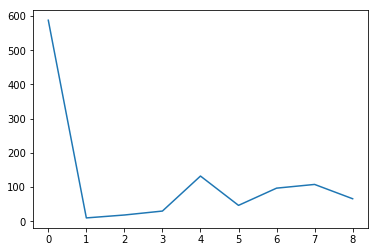

In [200]:
plt.plot(np.sum(U0, axis = 0))

In [268]:
np.sum(U0, axis = 0)

array([947.75020685,  23.2789538 ,  40.16045179,  81.81038756])

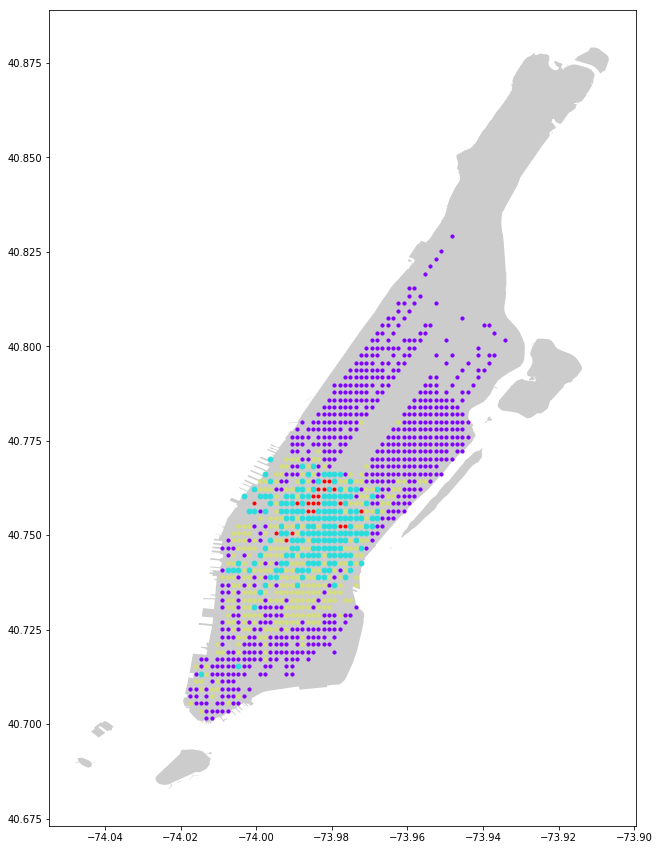

In [263]:
#path = Path(r'C:\Research\NMF_backup\State-Aggregation\100\9')

DIR = Path(r'C:\Research\NMF_backup\State-Aggregation')
R = 100
r = 4
PATH = DIR/str(R)
U0,V0 = hickle.load(r'C:\Research\NMF_backup\State-Aggregation-master\100\10\Output_r=04')
P = hickle.load(r'C:\Research\NMF_backup\State-Aggregation-master\100\100_Matrix.hkl')
statemap = hickle.load(r'C:\Research\NMF_backup\State-Aggregation-master\100\100_Statemap.hkl')
man = get_zones()
grid = get_joint_grid(man, R) 
grid = grid = get_center(grid)
inv_statemap = {v:k for k,v in statemap.items()}
pred = KMeans(n_clusters=r, n_init = 100).fit_predict(U0)

mapped_result = []
for group in range(r):
    mapped_result.append([float(inv_statemap[mem]) for mem in list(np.where(pred == group)[0])])
fig, ax = plt.subplots(figsize = (15,15))
man.plot(ax=ax, color = 'grey', alpha = 0.4)
ColorsA=plt.cm.rainbow(np.linspace(0,1,r),alpha=10)
#review = np.where(U[:,2] == 1)[0]
#grid.iloc[[float(inv_statemap[x]) for x in review],].plot(**{'color': 'blue', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[mapped_result[0],].plot(**{'color': 'red', 'markersize':np.random.randint(5,25)}, ax = ax)
#grid.iloc[[mapped_result[0]],].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)
for i,group in enumerate(mapped_result):
    grid.iloc[group,].plot(**{'color': ColorsA[i], 'markersize':np.random.randint(5,25)}, ax = ax)

In [ ]:
np.max(U,axis =0)

In [213]:
A = 1/np.array([0,0,1])

C:\ProgramData\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [214]:
from numpy import inf
A[A == inf] = 0

In [261]:
U2,V2,mu, E= non_negative_factorization(P,1,lr = 1000,lambda_=1e-8,eps =1e-14, local =False, max_iter = 10)

C:\Research\NMF\State-Aggregation\nmf_adaptive.py:68: RuntimeWarning: divide by zero encountered in true_divide
  kappa = starting_kappa**p/u


(1093, 2)
(1093, 2)


KeyboardInterrupt: 

In [ ]:
np.where(U[:,5] == 1)

In [ ]:
validate(U)

In [ ]:
validate(V)

In [246]:
U = np.array([[0.7],[1],[1]])

In [223]:
u = np.array([0.1,0,0.2])

In [247]:
kappa = 0.5/u
from numpy import inf
kappa[kappa == inf] = 0
kappa[kappa == -inf] = 0
kappa = np.diag(kappa.flatten())

C:\ProgramData\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [240]:
kappa

array([[5. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 2.5]])

In [241]:
kappa@u

array([0.5, 0. , 0.5])

In [242]:
np.diag(np.ones(3) - kappa@u)

array([[0.5, 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 0.5]])

In [248]:
U = np.diag(np.ones(3) - kappa@u)@U
#U = np.concatenate((U, kappa @ u), axis = 1)

In [250]:
U = np.concatenate((U, kappa @ u), axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [249]:
U

array([0.5, 1. , 0.5])